Netflix Data - Top 10 Countries

Movies added per year to Netflix for Top 10 Countries (Across Movies & TV Shows)

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#open csv
top_10_data = pd.read_csv('top_10_netflix_data.csv')

#display
top_10_data.head(5)

,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2


In [86]:
#Separate TV Shows
TV_df = top_10_data[top_10_data['type'] == 'TV Show']
TV_df.head(5)

,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2
5,TV Show,Falsa identidad,Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",September 22,2021.0,...,0,1,0,0,0,0,0,0,0,3
9,TV Show,Sex Education,United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",September 17,2021.0,...,1,0,0,0,0,0,0,0,0,3


In [80]:
#Viewing years in all countries
TV_years = TV_df.groupby('country')['year_added'].unique()
TV_years

country
Canada            [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
Egypt                              [2021.0, 2020.0, 2019.0, 2018.0]
France            [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
India                      [2021.0, 2020.0, 2019.0, 2018.0, 2017.0]
Japan             [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
Mexico                     [2021.0, 2020.0, 2019.0, 2018.0, 2017.0]
South Korea        [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
Spain              [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
United Kingdom    [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
United States     [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
Name: year_added, dtype: object

In [78]:
#Viewing number of TV shows in the countries
num_TV_shows = TV_df.groupby('country')['type'].count()
num_TV_shows

country
Canada             59
Egypt              14
France             49
India              79
Japan             168
Mexico             40
South Korea       158
Spain              48
United Kingdom    213
United States     760
Name: type, dtype: int64

In [104]:
# Aggregate the data to get the total number of TV shows added per country over the years
TV_data = TV_df.groupby(['country', 'year_added']).size().reset_index(name='num_shows')
TV_data

,country,year_added,num_shows
0,Canada,2014.0,1
1,Canada,2015.0,1
2,Canada,2016.0,7
3,Canada,2017.0,8
4,Canada,2018.0,8
...,...,...,...
60,United States,2017.0,77
61,United States,2018.0,113
62,United States,2019.0,151
63,United States,2020.0,208


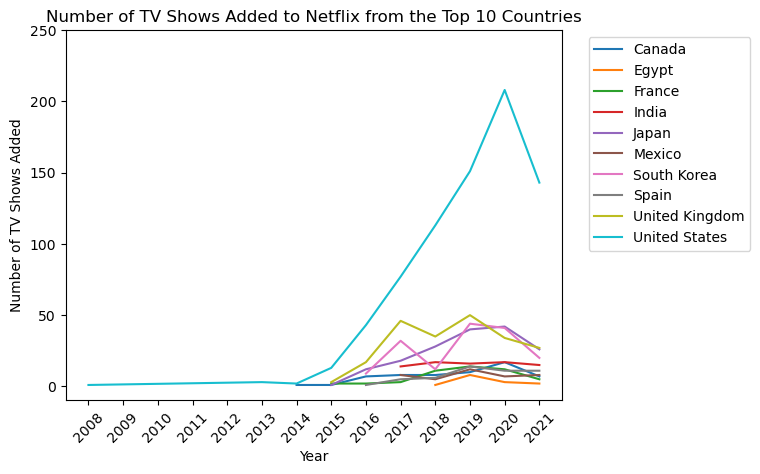

In [105]:
#First graph Top 10 Countries. How many TV shows are added per year based on each country? Line graph

#create list of y-labels due to missing values in year_added.
y_label_ls = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Plot the total number of TV shows added per country over the years
for country, data in TV_data.groupby('country'):
    plt.plot(data['year_added'], data['num_shows'], label=country)

plt.title('Number of TV Shows Added to Netflix from the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Added')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xticks(y_label_ls, rotation=45)
plt.yticks(np.arange(0, 300, 50))
# plt.grid()
plt.show()


# resources: Xpert Learning Assistant to aggreate data and complete for loop for plotting.
# legend location: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

Analysis: TV shows produced in the United States are added to Netflix at a higher rate compared to other countries. In 2014, Netflix began adding more TV shows produced by countries outside of the United States starting with Canada. By 2017, several more countries were added to the mix on Netflix. Between 2020 and 2021, a decline occurred for the top countries including the United States, Japan, United Kingdom, and South Korea. The timeline of the decline lines up with the affects of the pause in production of all movies and TV shows during the Coivd-19 pandemic.

In [84]:
#Separate Movies
Movie_df = top_10_data[top_10_data['type'] == 'Movie']
Movie_df.head(5)

,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
6,Movie,Jeans,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",September 21,2021.0,...,0,0,0,0,0,0,0,0,0,3
7,Movie,Grown Ups,United States,"September 20, 2021",2010,PG-13,103 min,Comedies,September 20,2021.0,...,0,0,0,0,0,0,0,0,0,1
8,Movie,Dark Skies,United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",September 19,2021.0,...,0,0,0,0,0,0,0,0,0,2


In [81]:
#Viewing years in all countries
Movie_years = Movie_df.groupby('country')['year_added'].unique()
Movie_years

country
Canada            [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
Egypt                                      [2021.0, 2020.0, 2019.0]
France             [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
India              [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
Japan              [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
Mexico            [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
South Korea                [2021.0, 2020.0, 2019.0, 2018.0, 2017.0]
Spain              [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
United Kingdom     [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016.0]
United States     [2021.0, 2020.0, 2019.0, 2018.0, 2017.0, 2016....
Name: year_added, dtype: object

In [82]:
#Viewing number of movies in the countries
num_Movies = Movie_df.groupby('country')['type'].count()
num_Movies

country
Canada             122
Egypt               92
France              75
India              893
Japan               76
Mexico              70
South Korea         41
Spain               97
United Kingdom     206
United States     2058
Name: type, dtype: int64

In [101]:
# Aggregate the data to get the total number of TV shows added per country over the years
Movie_data = Movie_df.groupby(['country', 'year_added']).size().reset_index(name='num_movies')
Movie_data

,country,year_added,num_movies
0,Canada,2013.0,1
1,Canada,2015.0,2
2,Canada,2016.0,5
3,Canada,2017.0,27
4,Canada,2018.0,24
...,...,...,...
62,United States,2017.0,285
63,United States,2018.0,338
64,United States,2019.0,526
65,United States,2020.0,416


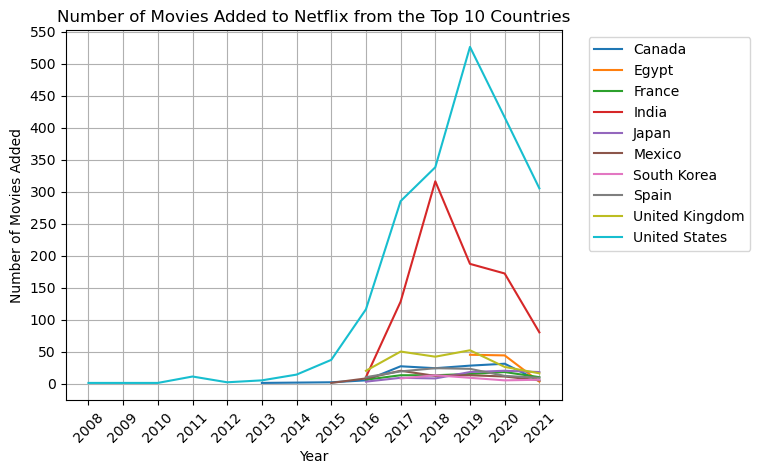

In [106]:
#Second graph Top 10 Countries. How many Movies are added per year based on each country? Line graph

# Plot the total number of TV shows added per country over the years
for country, data in Movie_data.groupby('country'):
    plt.plot(data['year_added'], data['num_movies'], label=country)

plt.title('Number of Movies Added to Netflix from the Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xticks(data['year_added'], rotation=45)
plt.yticks(np.arange(0, 600, 50))
plt.grid()
plt.show()

Analysis: In the movies catergory, the United States has the highest amount of movies added to Netflix overall. The United States has the highest rate of added productions in both movies and TV shows. India is the second highest country to have movies added to Netflix. The other top countries add less than 100 movies per year to Netflix's library. Starting in 2019, we begin to see the start of the decline from affects of the pause in production of all movies and TV shows during the Coivd-19 pandemic.